In [1]:
from fastai.vision.all import *
import pandas as pd
import numpy as np
import json
import timm
from fastdownload import download_url
from duckduckgo_search import DDGS

In [2]:
def image_label(f):
    return 'ship' if f.name[0]=='1' else 'no-ship'

In [3]:
default_device('mps')

device(type='mps')

# Data

In [4]:
path = Path('data/shipsnet/shipsnet/')

In [5]:
path.ls()

(#4000) [Path('data/shipsnet/shipsnet/0__20180708_180908_0f47__-118.14880745980487_33.73008948438861.png'),Path('data/shipsnet/shipsnet/1__20180711_180503_1027__-118.22759694858797_33.721431071380884.png'),Path('data/shipsnet/shipsnet/0__20170605_180825_1032__-122.38960883966568_37.74086109763781.png'),Path('data/shipsnet/shipsnet/0__20170730_181513_0e20__-122.34279745119264_37.75164147174362.png'),Path('data/shipsnet/shipsnet/0__20170702_180943_103c__-122.29241794939065_37.73869535942699.png'),Path('data/shipsnet/shipsnet/0__20180710_182342_1011__-122.3387223196089_37.708247340250495.png'),Path('data/shipsnet/shipsnet/0__20170901_181520_0e14__-122.35963864537221_37.79296914588649.png'),Path('data/shipsnet/shipsnet/1__20170707_174131_0c0b__-122.34498864216236_37.72712888630869.png'),Path('data/shipsnet/shipsnet/0__20170822_181222_0f31__-122.19769387213661_37.820774073552876.png'),Path('data/shipsnet/shipsnet/0__20170902_190520_0f53__-122.10329079539491_37.749062109652264.png')...]

ship


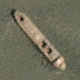

In [6]:
fname = path.ls()[np.random.randint(0,len(path.ls()))]
im = Image.open(fname)
print(image_label(fname))
im.to_thumb(80,80)

In [7]:
# Build dataloader
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=image_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

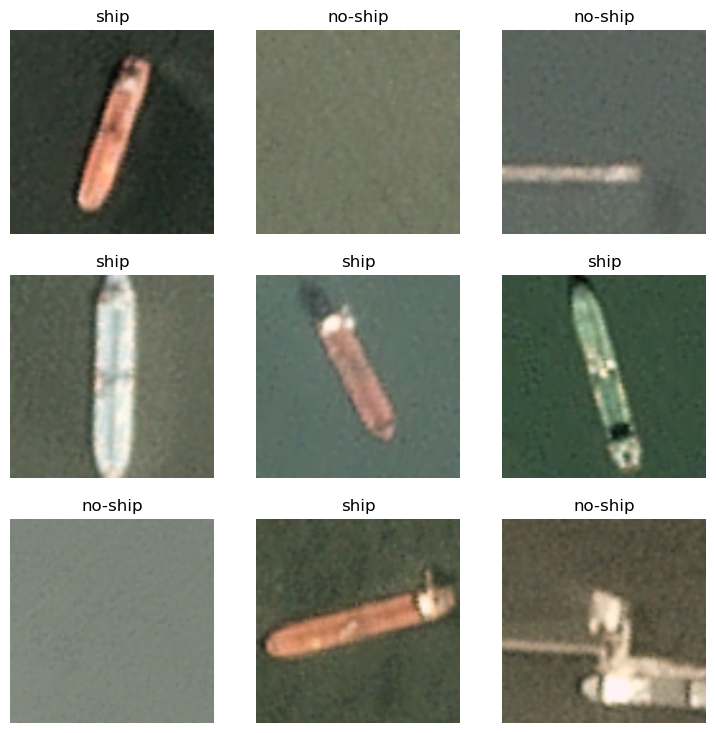

In [8]:
dls.show_batch()

# Train

In [11]:
learn = vision_learner(dls,'resnet18',metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.716781,0.317337,0.111250,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.365234,0.227500,0.090000,00:17
1,0.292301,0.174924,0.051250,00:16
2,0.237264,0.174759,0.066250,00:16


# Predict

In [12]:
urls = L(DDGS().images(keywords='satellite image of a ship', max_results=1)).itemgot('image')

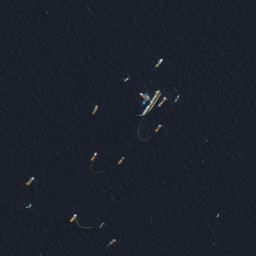

In [13]:
dest='data/ship.jpg'
download_url(urls[0],dest=dest)

im = Image.open(dest)
im.to_thumb(256,256)

In [14]:
learn.predict(PILImage.create(dest))

('no-ship', tensor(0), tensor([0.9965, 0.0035]))